In [1]:
#!pip install imbalanced-learn

In [2]:
#!pip3 install --upgrade imbalanced-learn

In [3]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
#from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#import xgboost as xgb
from sklearn import tree
#from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [4]:
path = 'case_control_merge_v2.xlsx'

In [5]:
df = pd.read_excel(path)

In [6]:
print(df.shape)

(326, 90)


In [7]:
df2 = df[['Gender',
       'What is your age? (Birth year)', 'What is your education level?',
       'What is your profession?', 'Where do you live?',
       'How much is your family\'s earning?  (In Bdt)',
       'Do you have savings left after month\'s earning?',
       'What is your family type?', 'What is your marital status?',
       'How long are you married?', 'How many children do you have?',
       'Which religion do you follow?', 'Do you smoke?',
       'If yes, when did you start smoking?',
       'If previously had smoked, how long did you smoke?',
       'How many cigarettes did you have per day?',
       'Do you have habit of smoking weed with cigarette?',
       'Do any of your family member smoke?',
       'If yes, how many of your family member smoke?',
       'If yes, bow many cigarettes do they smoke per day?',
       'Do you have habit of eating betel leaf?', 'Do you use tobacco?',
       'Do you drink alcohol?', 'If yes, bow frequently do drink per month?',
       'How many days do you eat fish per week?',
       'How many days do you eat meat per week?',
       'How many days do you eat vegetables per week?',
       'How many meals consist of rice per day?', 'Do you have diabetes?',
       'If yes, do you take any medicine prescribed by the doctor?',
       'Do you have high blood pressure?',
       'If yes, do you take any medicine prescribed by the doctor?2',
       'Do you have gastric problem?', 'Do you take pain killer?',
       'If yes, do you take pain killer in empty stomach?', 'Height', 'Weight',
       'Do any of your family member has cancer?',
       'tobacco_gool', 'tobacco_jarda',
       'tobacco_hada', 'tea_coffee', 'fried_rice', 'grilled_meat',
       'preserved_fish', 'food_none', 'salty', 'sweet', 'reddish', 'colorless',
       'gastric_Ranitidine', 'gastric_Omiprazole', 'gastric_Esomeprazole',
       'gastric_Pantoprazole', 'gastric_Rabeprazole', 'no_med', 
       'Filt_water', 'Pond', 'Rain', 'River', 'Supply_water', 'Tube_well',
       'output']]

In [8]:
# Number of missing in each column
missing = pd.DataFrame(df2.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(df2)

missing.sort_values('percent', ascending = False).head(30)

,total,percent
"If yes, do you take pain killer in empty stomach?",163,0.500000
"If yes, do you take any medicine prescribed by the doctor?2",162,0.496933
Do you take pain killer?,162,0.496933
Do any of your family member has cancer?,162,0.496933
"If yes, do you take any medicine prescribed by the doctor?",162,0.496933
Weight,162,0.496933
Height,162,0.496933
Do you have diabetes?,161,0.493865
Do you have high blood pressure?,161,0.493865
Do you have gastric problem?,161,0.493865


In [9]:
df1 = df.copy()

In [10]:
# Drop columns 2nd to 6th
df1 = df1.drop(df1.columns[1:7], axis=1)

In [11]:
df1["output"].value_counts()

control    220
disease    106
Name: output, dtype: int64

In [12]:
df1.head(5)

,Participant's ID,District,Type of cancer,Gender,What is your age? (Birth year),What is your education level?,What is your profession?,Where do you live?,How much is your family's earning? (In Bdt),Do you have savings left after month's earning?,...,gastric_Rabeprazole,no_med,no_gastric,Filt_water,Pond,Rain,River,Supply_water,Tube_well,output
0,C01,Pirojpur,NaN,1,46,6,2,2.0,90000.0,2.0,...,0,0,NaN,0,0,0,0,0,1,control
1,C02,Jamalpur,NaN,1,63,4,3,2.0,25000.0,1.0,...,0,0,NaN,0,0,0,0,1,0,control
2,C03,Tangail,NaN,1,30,5,2,1.0,25000.0,2.0,...,0,0,NaN,0,0,0,0,0,1,control
3,C04,Gazipur,NaN,1,50,4,2,2.0,22000.0,2.0,...,0,0,NaN,1,0,0,0,0,0,control
4,C05,Bagura,NaN,1,54,4,2,2.0,15000.0,1.0,...,0,0,NaN,0,0,0,0,0,1,control


In [13]:
#df1.dropna(inplace=True)  # Drop rows with missing values
#df1.reset_index(drop=True, inplace=True)  # Reset the index

## Case 

In [14]:
# Filter rows where 'output' is 'control'
case_data = df1[df1['output'] == 'disease'].copy()
con_data = df1[df1['output'] == 'control'].copy()

In [15]:
case_data.columns

Index(['Participant's ID', 'District', 'Type of cancer', 'Gender',
       'What is your age? (Birth year)', 'What is your education level?',
       'What is your profession?', 'Where do you live?',
       'How much is your family's earning?  (In Bdt)',
       'Do you have savings left after month's earning?',
       'What is your family type?', 'What is your marital status?',
       'How long are you married?', 'How many children do you have?',
       'Which religion do you follow?', 'Do you smoke?',
       'If yes, when did you start smoking?',
       'If previously had smoked, how long did you smoke?',
       'How many cigarettes did you have per day?',
       'Do you have habit of smoking weed with cigarette?',
       'Do any of your family member smoke?',
       'If yes, how many of your family member smoke?',
       'If yes, bow many cigarettes do they smoke per day?',
       'Do you have habit of eating betel leaf?', 'Do you use tobacco?',
       'Do you drink alcohol?', 'If yes,

In [16]:
print(case_data["Gender"].value_counts()) #1 male, 2 female
print(con_data["Gender"].value_counts())

1    72
2    34
Name: Gender, dtype: int64
1    144
2     76
Name: Gender, dtype: int64


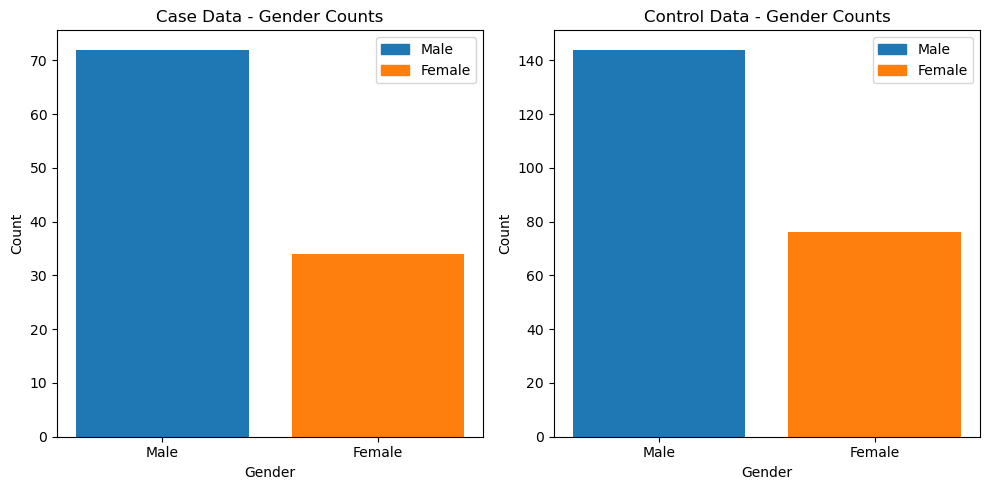

In [17]:
import matplotlib.pyplot as plt

# Define colors for each gender
gender_colors = {1: '#1f77b4', 2: '#ff7f0e'}
gender_labels = {1: 'Male', 2: 'Female'}

# Function to plot the graph with given data and title
def plot_graph(ax, counts, title):
    bars = ax.bar([gender_labels[gender] for gender in counts.index], counts.values, color=[gender_colors[gender] for gender in counts.index], label="Gender")
    ax.set_title(f"{title} - Gender Counts")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Count")
    custom_legend = [plt.Rectangle((0, 0), 1, 1, color=gender_colors[1]), plt.Rectangle((0, 0), 1, 1, color=gender_colors[2])]
    ax.legend(custom_legend, ['Male', 'Female'])

# Create a figure and axes to plot the data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot both "Case Data" and "Control Data"
plot_graph(axes[0], case_data["Gender"].value_counts(), "Case Data")
plot_graph(axes[1], con_data["Gender"].value_counts(), "Control Data")

# Display the plots
plt.tight_layout()
plt.show()


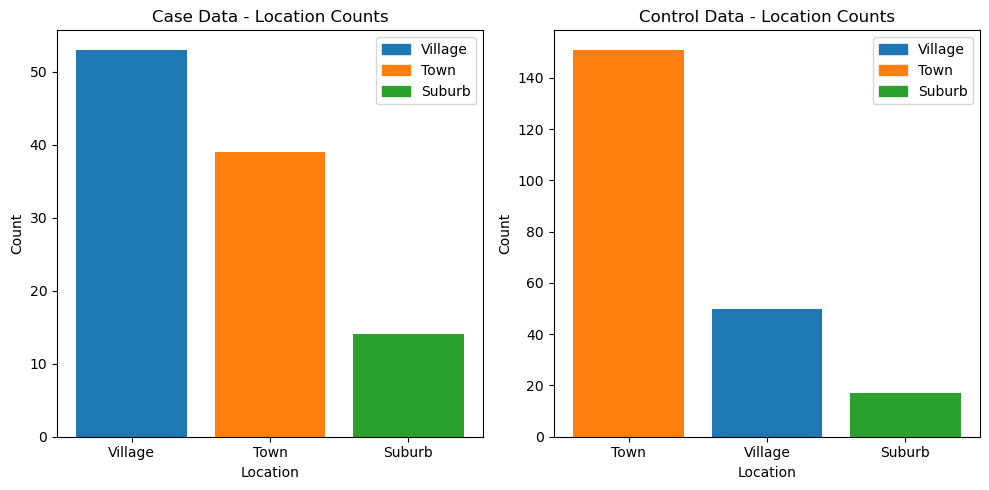

In [18]:
import matplotlib.pyplot as plt

# Define eye-soothing colors for each location
location_colors = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c'}
location_labels = {1: 'Village', 2: 'Town', 3: 'Suburb'}

# Function to plot the graph with given data and title
def plot_graph(ax, counts, title):
    bars = ax.bar([location_labels[location] for location in counts.index], counts.values, color=[location_colors[location] for location in counts.index], label="Location")
    ax.set_title(f"{title} - Location Counts")
    ax.set_xlabel("Location")
    ax.set_ylabel("Count")
    custom_legend = [plt.Rectangle((0, 0), 1, 1, color=location_colors[1]), plt.Rectangle((0, 0), 1, 1, color=location_colors[2]), plt.Rectangle((0, 0), 1, 1, color=location_colors[3])]
    ax.legend(custom_legend, ['Village', 'Town', 'Suburb'])

# Create a figure and axes to plot the data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot "Case Data" and "Control Data" separately
plot_graph(axes[0], case_data["Where do you live?"].value_counts(), "Case Data")
plot_graph(axes[1], con_data["Where do you live?"].value_counts(), "Control Data")

# Display the plots
plt.tight_layout()
plt.show()


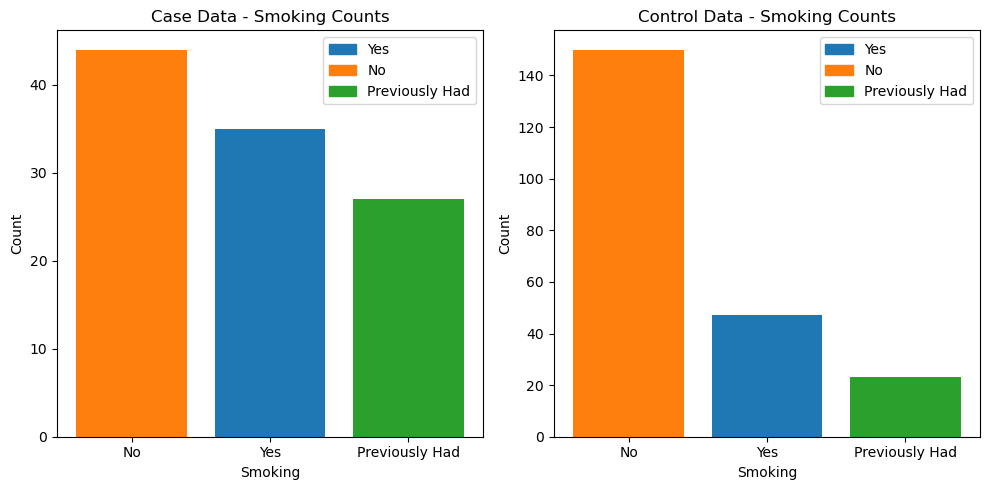

In [19]:
import matplotlib.pyplot as plt

# Define eye-soothing colors for each option
smoking_colors = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c'}
smoking_labels = {1: 'Yes', 2: 'No', 3: 'Previously Had'}

# Function to plot the graph with given data and title
def plot_graph(ax, counts, title):
    bars = ax.bar([smoking_labels[smoking] for smoking in counts.index], counts.values, color=[smoking_colors[smoking] for smoking in counts.index], label="Smoking")
    ax.set_title(f"{title} - Smoking Counts")
    ax.set_xlabel("Smoking")
    ax.set_ylabel("Count")
    custom_legend = [plt.Rectangle((0, 0), 1, 1, color=smoking_colors[1]), plt.Rectangle((0, 0), 1, 1, color=smoking_colors[2]), plt.Rectangle((0, 0), 1, 1, color=smoking_colors[3])]
    ax.legend(custom_legend, ['Yes', 'No', 'Previously Had'])

# Create a figure and axes to plot the data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot "Case Data" and "Control Data" for "Do you smoke?" column
plot_graph(axes[0], case_data["Do you smoke?"].value_counts(), "Case Data")
plot_graph(axes[1], con_data["Do you smoke?"].value_counts(), "Control Data")

# Display the plots
plt.tight_layout()
plt.show()


In [20]:
print(case_data["Do you smoke?"].value_counts())
print(con_data["Do you smoke?"].value_counts())

2    44
1    35
3    27
Name: Do you smoke?, dtype: int64
2    150
1     47
3     23
Name: Do you smoke?, dtype: int64


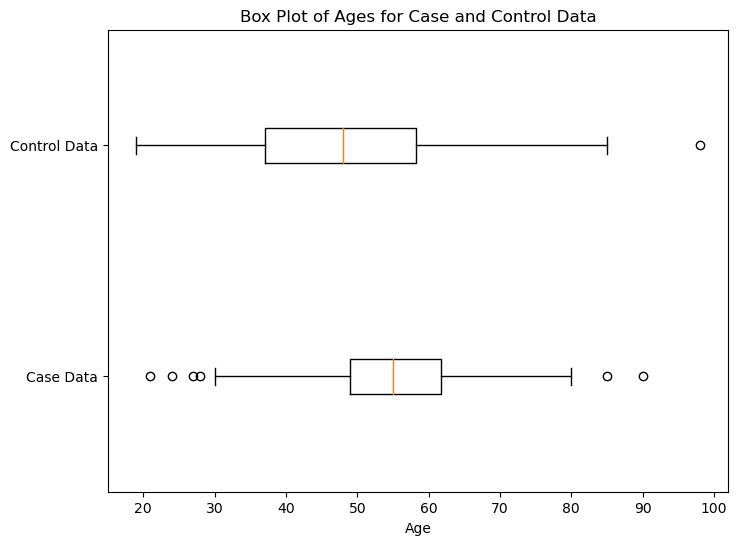

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration (replace with your actual dataframes)
#case_data = {"What is your age? (Birth year)": [1980, 1990, 1975, 1995, 1960, 1985, 1900, 2020]}
#con_data = {"What is your age? (Birth year)": [1988, 1995, 1970, 1975, 1980, 1985, 2000]}

# Create the box plot with outliers
plt.figure(figsize=(8, 6))
plt.boxplot([case_data["What is your age? (Birth year)"], con_data["What is your age? (Birth year)"]], vert=False, labels=["Case Data", "Control Data"])
plt.title("Box Plot of Ages for Case and Control Data")
plt.xlabel("Age")
plt.show()

Case Data - Age Group Counts:
18-30     4
31-40     6
41-50    16
51-60    39
61+      41
dtype: int64

Control Data - Age Group Counts:
18-30    12
31-40    52
41-50    49
51-60    52
61+      55
dtype: int64


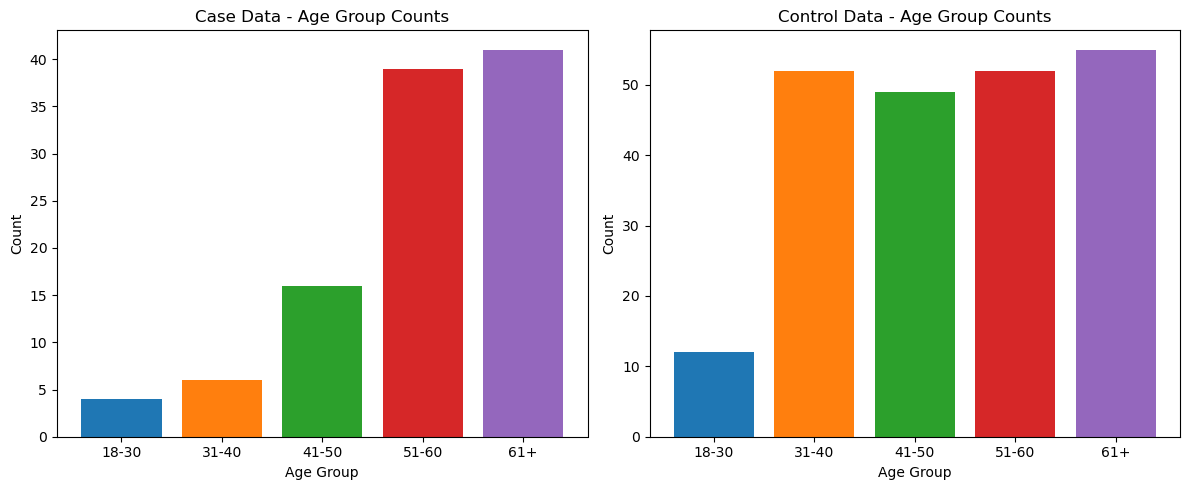

In [22]:
# Define age group ranges
age_groups = {
    "18-30": (2004, 1995),
    "31-40": (1994, 1985),
    "41-50": (1984, 1975),
    "51-60": (1974, 1965),
    "61+": (1964, 1900)
}

# Function to calculate age groups for the given birth years
def get_age_group(birth_years):
    age_group_counts = {group: 0 for group in age_groups.keys()}
    for birth_year in birth_years:
        age = 2023 - birth_year
        for group, (max_year, min_year) in age_groups.items():
            if min_year <= age <= max_year:
                age_group_counts[group] += 1
                break
    return pd.Series(age_group_counts)

# Calculate age group counts for "Case Data" and "Control Data"
case_age_groups = get_age_group(case_data["What is your age? (Birth year)"])
con_age_groups = get_age_group(con_data["What is your age? (Birth year)"])

print("Case Data - Age Group Counts:")
print(case_age_groups)

print("\nControl Data - Age Group Counts:")
print(con_age_groups)

# Define eye-soothing colors for each age group
age_group_colors = {
    "18-30": '#1f77b4',
    "31-40": '#ff7f0e',
    "41-50": '#2ca02c',
    "51-60": '#d62728',
    "61+": '#9467bd'
}

# Function to plot the age group counts
def plot_age_groups(ax, age_group_counts, title):
    bars = ax.bar(age_group_counts.index, age_group_counts.values, color=[age_group_colors[group] for group in age_group_counts.index])
    ax.set_title(title)
    ax.set_xlabel("Age Group")
    ax.set_ylabel("Count")

# Create a figure and axes to plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot "Case Data" and "Control Data" age group counts
plot_age_groups(axes[0], case_age_groups, "Case Data - Age Group Counts")
plot_age_groups(axes[1], con_age_groups, "Control Data - Age Group Counts")

# Display the plots
plt.tight_layout()
plt.show()


In [23]:
print(case_data["What is your age? (Birth year)"].mean())
print(con_data["What is your age? (Birth year)"].mean())

54.43396226415094
48.30909090909091


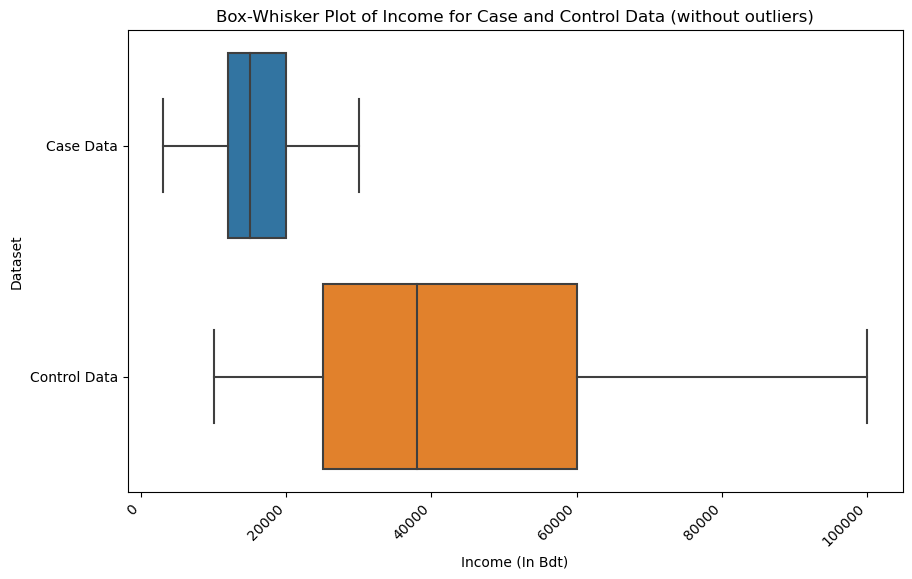

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
#case_data = pd.DataFrame({"How much is your family's earning?  (In Bdt)": [30000, 40000, 20000, 50000, None, 30000]})  # Income data for case
#con_data = pd.DataFrame({"How much is your family's earning?  (In Bdt)": [35000, 45000, 35000, None, 40000]})  # Income data for control

# Combine data from both case_data and con_data
combined_data = pd.concat([case_data, con_data])

# Create the box-whisker plot using Seaborn and hide outliers
plt.figure(figsize=(10, 6))  # Increase the size of the plot
sns.boxplot(x=combined_data["How much is your family's earning?  (In Bdt)"], y=["Case Data"] * len(case_data) + ["Control Data"] * len(con_data), showfliers=False)
plt.title("Box-Whisker Plot of Income for Case and Control Data (without outliers)")
plt.xlabel("Income (In Bdt)")
plt.ylabel("Dataset")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


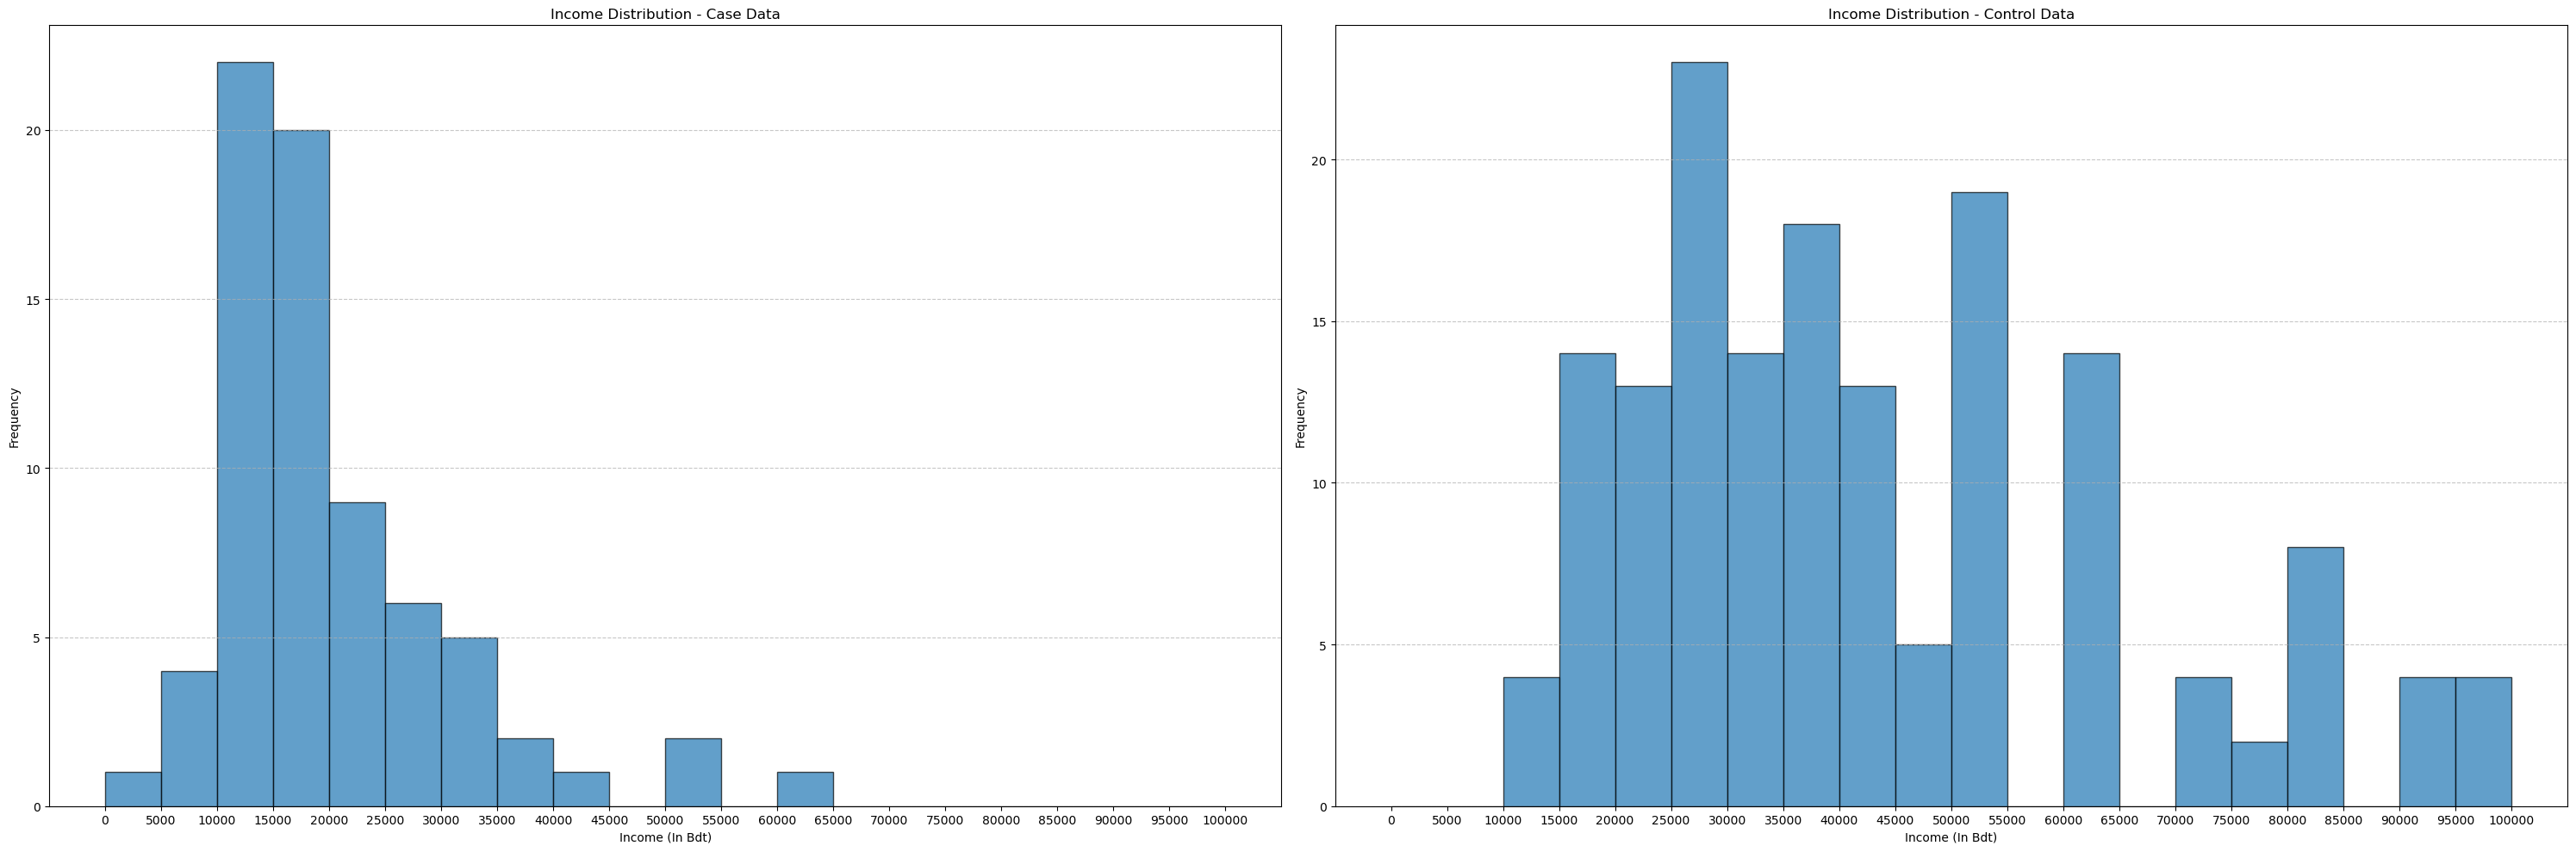

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration
#case_data = pd.DataFrame({"How much is your family's earning?  (In Bdt)": [30000, 40000, 20000, 50000, None, 30000]})  # Income data for case
#con_data = pd.DataFrame({"How much is your family's earning?  (In Bdt)": [35000, 45000, 35000, None, 40000]})  # Income data for control

# Function to plot income distribution with a specified bin size
def plot_income_distribution(data, title, bin_size):
    bins = range(0, 100001, bin_size)  # Create bins with the specified bin_size
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.xticks(bins)
    plt.title(title)
    plt.xlabel("Income (In Bdt)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create subplots for "Case Data" and "Control Data" side by side
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)  # Subplot 1 for Case Data
plot_income_distribution(case_data["How much is your family's earning?  (In Bdt)"], "Income Distribution - Case Data", bin_size=5000)

plt.subplot(1, 2, 2)  # Subplot 2 for Control Data
plot_income_distribution(con_data["How much is your family's earning?  (In Bdt)"], "Income Distribution - Control Data", bin_size=5000)

plt.tight_layout()
plt.show()


In [26]:
#print(case_data["How much is your family's earning?  (In Bdt)"].mean())
#print(con_data["How much is your family's earning?  (In Bdt)"].mean())

In [27]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='output', y="How much is your family's earning? (In Bdt)", data=df1, showfliers=False)
# plt.title('Earning by Target')

# plt.show()

In [28]:
#print(case_data[case_data["How much is your family's earning?  (In Bdt)"] < 40000]["How much is your family's earning?  (In Bdt)"].mean())
#print(con_data[con_data["How much is your family's earning?  (In Bdt)"] < 60000]["How much is your family's earning?  (In Bdt)"].mean())

In [29]:
print(case_data[case_data["How many cigarettes did you have per day?"] > 0]["How many cigarettes did you have per day?"].mean())
print(con_data[con_data["How many cigarettes did you have per day?"] > 0]["How many cigarettes did you have per day?"].mean())

13.209677419354838
7.880597014925373


In [30]:
print(case_data[case_data["If yes, when did you start smoking?"] > 0]["If yes, when did you start smoking?"].mean())
print(con_data[con_data["If yes, when did you start smoking?"] > 0]["If yes, when did you start smoking?"].mean())

28.837209302325583
17.425531914893618


In [31]:
print(case_data["Do any of your family member has cancer?"].value_counts())
print(con_data["Do any of your family member has cancer?"].value_counts())

2.0    64
1.0    41
0.0     1
Name: Do any of your family member has cancer?, dtype: int64
1.0    56
2.0     2
Name: Do any of your family member has cancer?, dtype: int64


In [32]:
print(case_data["If yes, what kind of cancer do they have?"].value_counts())
print(con_data["If yes, what kind of cancer do they have?"].value_counts())

0              66
STOMACH         8
BREAST          6
LUNG            6
PANCREATIC      5
ESOPHAGEAL      4
UTERUS          4
COLON           2
BLOOD           2
ORAL            2
ANAL            1
Name: If yes, what kind of cancer do they have?, dtype: int64
Stomach        10
Breast          8
Lung            8
Esophageal      8
Blood           6
Pancreatic      5
Uterus          4
Colon           3
Anal            1
Name: If yes, what kind of cancer do they have?, dtype: int64


In [33]:
print(case_data["Do you have gastric problem?"].value_counts())
print(con_data["Do you have gastric problem?"].value_counts())

1.0    97
2.0     9
Name: Do you have gastric problem?, dtype: int64
1.0     45
2.0     13
57.0     1
Name: Do you have gastric problem?, dtype: int64


In [34]:
print(case_data["If yes, do you take pain killer in empty stomach?"].value_counts())
print(con_data["If yes, do you take pain killer in empty stomach?"].value_counts())

0.0    50
2.0    37
1.0    18
Name: If yes, do you take pain killer in empty stomach?, dtype: int64
0.0    32
2.0    26
Name: If yes, do you take pain killer in empty stomach?, dtype: int64


In [35]:
case_tobacco = case_data.groupby(['tobacco_gool', 'tobacco_jarda', 'tobacco_hada']).size().reset_index(name='count')
case_tobacco

,tobacco_gool,tobacco_jarda,tobacco_hada,count
0,0,0,0,41
1,0,0,1,6
2,0,1,0,40
3,0,1,1,6
4,1,0,0,8
5,1,1,0,5


In [36]:
con_tobacco= con_data.groupby(['tobacco_gool', 'tobacco_jarda', 'tobacco_hada']).size().reset_index(name='count')
con_tobacco

,tobacco_gool,tobacco_jarda,tobacco_hada,count
0,0,0,0,170
1,0,1,0,35
2,1,0,0,14
3,1,1,0,1


In [37]:
case_food = case_data.groupby(['tea_coffee', 'fried_rice', 'grilled_meat', 'preserved_fish']).size().reset_index(name='count')
case_food

,tea_coffee,fried_rice,grilled_meat,preserved_fish,count
0,0,0,0,0,2
1,0,0,0,1,9
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,0,0,2
5,0,1,0,1,2
6,0,1,1,0,4
7,1,0,0,0,30
8,1,0,0,1,13
9,1,0,1,0,12


In [38]:
con_food = con_data.groupby(['tea_coffee', 'fried_rice', 'grilled_meat', 'preserved_fish']).size().reset_index(name='count')
con_food

,tea_coffee,fried_rice,grilled_meat,preserved_fish,count
0,0,0,0,0,2
1,0,0,0,1,6
2,0,0,1,0,14
3,0,1,0,0,29
4,0,1,1,0,10
5,1,0,0,0,69
6,1,0,0,1,20
7,1,0,1,0,22
8,1,0,1,1,4
9,1,1,0,0,18


In [39]:
case_water = case_data.groupby(['Filt_water', 'Pond', 'Rain', 'River', 'Supply_water', 'Tube_well']).size().reset_index(name='count')
case_water

,Filt_water,Pond,Rain,River,Supply_water,Tube_well,count
0,0,0,0,0,0,1,42
1,0,0,0,0,1,0,43
2,0,0,0,0,1,1,2
3,0,1,0,0,0,1,1
4,1,0,0,0,0,0,16
5,1,0,0,0,1,0,2


In [40]:
con_water = con_data.groupby(['Filt_water', 'Pond', 'Rain', 'River', 'Supply_water', 'Tube_well']).size().reset_index(name='count')
con_water

,Filt_water,Pond,Rain,River,Supply_water,Tube_well,count
0,0,0,0,0,0,1,58
1,0,0,0,0,1,0,107
2,0,0,1,0,0,0,3
3,1,0,0,0,0,0,52


In [41]:
case_taste = case_data.groupby(['salty', 'sweet', 'reddish', 'colorless']).size().reset_index(name='count')
case_taste

,salty,sweet,reddish,colorless,count
0,0,0,0,0,2
1,0,0,0,1,16
2,0,1,0,0,54
3,0,1,0,1,21
4,1,0,0,0,7
5,1,0,0,1,4
6,1,0,1,0,2


In [42]:
con_taste = con_data.groupby(['salty', 'sweet', 'reddish', 'colorless']).size().reset_index(name='count')
con_taste

,salty,sweet,reddish,colorless,count
0,0,0,0,1,56
1,0,1,0,0,151
2,0,1,0,1,1
3,1,0,0,0,12


In [43]:
case_gastric = case_data.groupby(['gastric_Ranitidine', 'gastric_Omiprazole', 'gastric_Esomeprazole', 'gastric_Pantoprazole', 'gastric_Rabeprazole']).size().reset_index(name='count')
case_gastric

,gastric_Ranitidine,gastric_Omiprazole,gastric_Esomeprazole,gastric_Pantoprazole,gastric_Rabeprazole,count
0,0,0,0,0,0,8
1,0,0,0,0,1,19
2,0,0,0,1,0,18
3,0,0,1,0,0,27
4,0,0,1,1,0,1
5,0,1,0,0,0,27
6,1,0,0,0,0,6


In [44]:
con_gastric = con_data.groupby(['gastric_Ranitidine', 'gastric_Omiprazole', 'gastric_Esomeprazole', 'gastric_Pantoprazole', 'gastric_Rabeprazole']).size().reset_index(name='count')
con_gastric

,gastric_Ranitidine,gastric_Omiprazole,gastric_Esomeprazole,gastric_Pantoprazole,gastric_Rabeprazole,count
0,0,0,0,0,0,174
1,0,0,0,1,0,13
2,0,0,1,0,0,8
3,0,1,0,0,0,10
4,0,1,1,0,0,2
5,1,0,0,0,0,13


In [45]:
# replacing values
df2['output'].replace(['control', 'disease'], [0, 1], inplace=True)

In [46]:
class_counts = df1['output'].value_counts()
print(class_counts)

control    220
disease    106
Name: output, dtype: int64


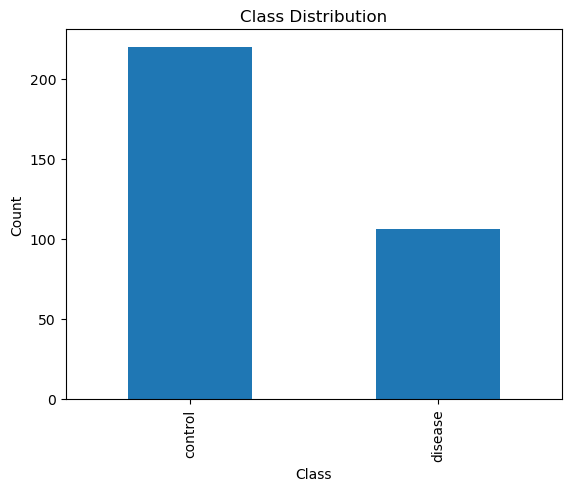

In [47]:
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [48]:
df3 = df2.copy()

In [49]:
# Split the data into features (X) and target variable (y)
X = df2.drop('output', axis=1)
y = df2['output']

In [50]:
df2.columns

Index(['Gender', 'What is your age? (Birth year)',
       'What is your education level?', 'What is your profession?',
       'Where do you live?', 'How much is your family's earning?  (In Bdt)',
       'Do you have savings left after month's earning?',
       'What is your family type?', 'What is your marital status?',
       'How long are you married?', 'How many children do you have?',
       'Which religion do you follow?', 'Do you smoke?',
       'If yes, when did you start smoking?',
       'If previously had smoked, how long did you smoke?',
       'How many cigarettes did you have per day?',
       'Do you have habit of smoking weed with cigarette?',
       'Do any of your family member smoke?',
       'If yes, how many of your family member smoke?',
       'If yes, bow many cigarettes do they smoke per day?',
       'Do you have habit of eating betel leaf?', 'Do you use tobacco?',
       'Do you drink alcohol?', 'If yes, bow frequently do drink per month?',
       'How many da

# GIT

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer 

## KNN

In [52]:
# split the data
#X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)


X = df2.drop('output', axis=1)

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

In [53]:

# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [54]:

# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test) 
     

In [55]:

# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.85526316 0.89035088 0.78947368 0.81578947 0.78070175
 0.79385965 0.75438596 0.76315789 0.74561404]
Test Accuracy:  [0.84693878 0.78571429 0.81632653 0.74489796 0.78571429 0.73469388
 0.74489796 0.71428571 0.7244898  0.70408163]


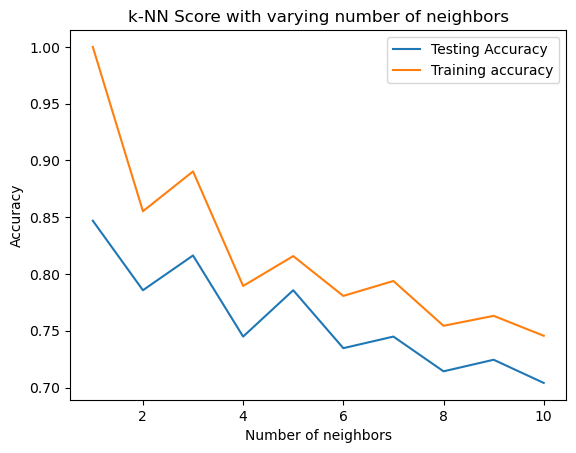

In [56]:

# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [57]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [58]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [59]:
knn_cv.best_score_

0.8467632850241547

In [60]:
# predictions
knn_predict = knn_cv.predict(X_test)

In [61]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        66
           1       0.87      0.62      0.73        32

    accuracy                           0.85        98
   macro avg       0.85      0.79      0.81        98
weighted avg       0.85      0.85      0.84        98



In [62]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [63]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [64]:
accuracy_score(y_train,train_preds)

1.0

In [65]:
accuracy_score(y_test,test_preds)


0.9795918367346939

# Class weight value

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.impute import SimpleImputer


X = df2.drop('output', axis=1)

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
'''
# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create the classifier with class weights
class_weight_dict = dict(enumerate(class_weights))
clf = LogisticRegression(class_weight=class_weight_dict)

# Train the classifier
clf.fit(X_train, y_train)
'''

"\n# Calculate class weights\nclass_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)\n\n# Create the classifier with class weights\nclass_weight_dict = dict(enumerate(class_weights))\nclf = LogisticRegression(class_weight=class_weight_dict)\n\n# Train the classifier\nclf.fit(X_train, y_train)\n"

# Feature selection

In [67]:
# Create a RandomForestClassifier model
rf_estimator = RandomForestClassifier()

# Fit the RandomForestClassifier on the training data
rf_estimator.fit(X_train, y_train)

# Create the RFE model and fit it with the RandomForestClassifier estimator
num_features_to_select = 10  # Change this value to the desired number of features to keep
rfe = RFE(rf_estimator, n_features_to_select=num_features_to_select)
X_train_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the column names of the selected features
selected_feature_names_rfe = X_encoded.columns[selected_feature_indices]

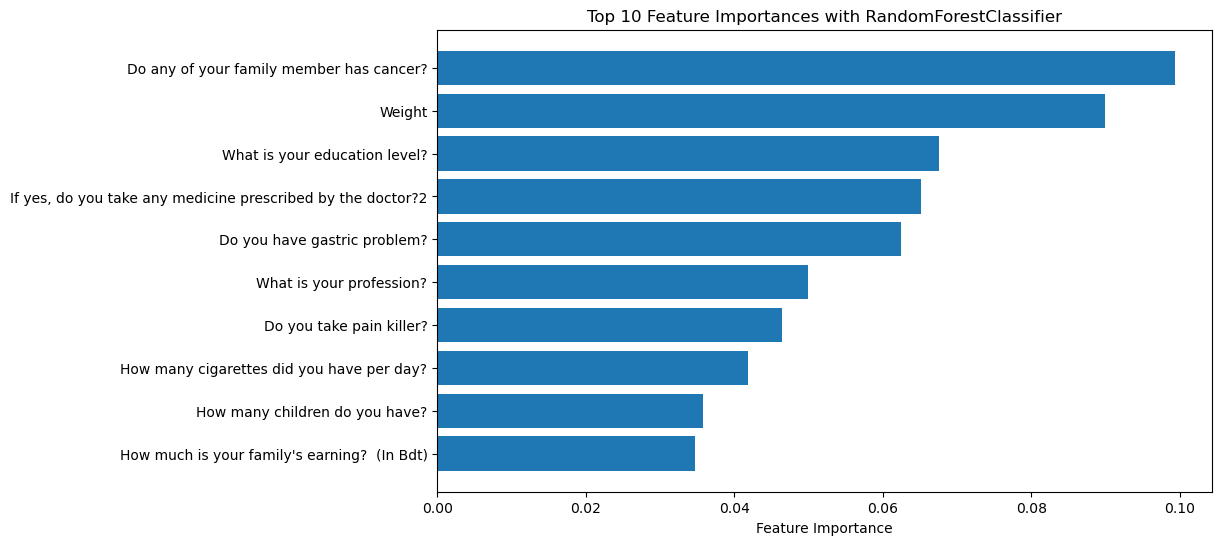

In [68]:
# Get the feature importances and sort them in descending order
feature_importances = rf_estimator.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
top_n = 10  # Change this value to the desired number of top features to display
top_feature_importances = feature_importances[sorted_indices[:top_n]]
top_feature_names = X_encoded.columns[sorted_indices[:top_n]]

# Plot the top feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importances with RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert the y-axis to display features from top to bottom
plt.show()

# Print the selected feature names
#print("Selected Feature Names:")
#print(selected_feature_names_rfe)

In [69]:
# Create the Logistic Regression model with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Get the nonzero feature coefficients
nonzero_feature_indices = lasso_model.coef_.nonzero()[1]

# Get the column names of the selected features
selected_feature_names_lasso = X_encoded.columns[nonzero_feature_indices]

# Select the columns with the selected features
X_train_selected = X_train[:, nonzero_feature_indices]
X_test_selected = X_test[:, nonzero_feature_indices]


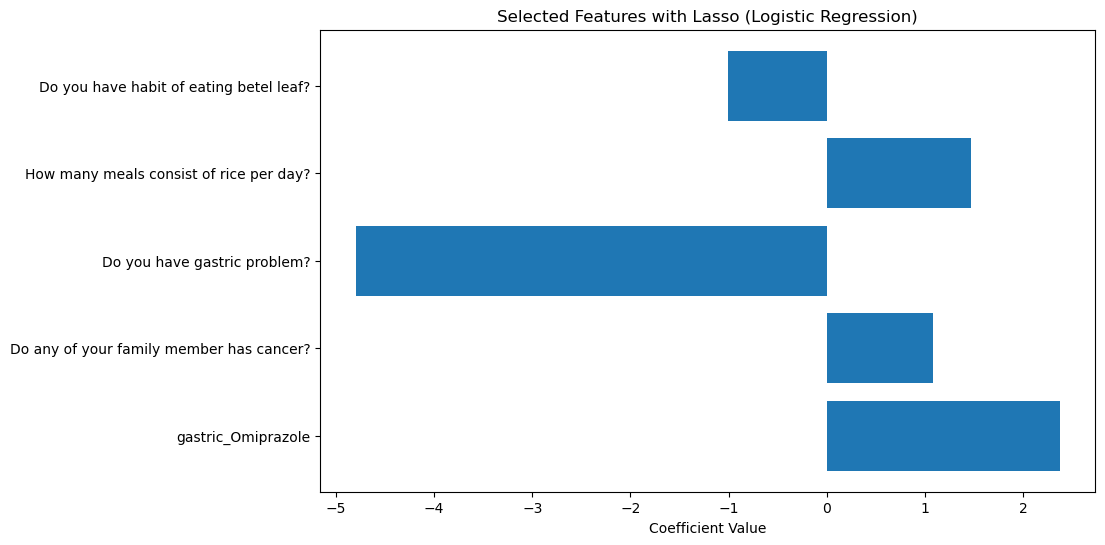

Selected Feature Names:
Index(['Do you have habit of eating betel leaf?',
       'How many meals consist of rice per day?',
       'Do you have gastric problem?',
       'Do any of your family member has cancer?', 'gastric_Omiprazole'],
      dtype='object')


In [70]:
import matplotlib.pyplot as plt

# Create the Logistic Regression model with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Get the nonzero feature coefficients and their absolute values
nonzero_feature_indices = lasso_model.coef_.nonzero()[1]
selected_feature_names_lasso = X_encoded.columns[nonzero_feature_indices]

# Select the columns with the selected features
X_train_selected = X_train[:, nonzero_feature_indices]
X_test_selected = X_test[:, nonzero_feature_indices]

# Filter coefficients based on the absolute value (greater than 1 or less than -1)
coefficients = lasso_model.coef_[0, nonzero_feature_indices]
selected_feature_names_lasso_filtered = selected_feature_names_lasso[abs(coefficients) > 1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_feature_names_lasso_filtered)), coefficients[abs(coefficients) > 1], align='center')
plt.yticks(range(len(selected_feature_names_lasso_filtered)), selected_feature_names_lasso_filtered)
plt.xlabel('Coefficient Value')
plt.title('Selected Features with Lasso (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis to display features from top to bottom
plt.show()

# Print the selected feature names
print("Selected Feature Names:")
print(selected_feature_names_lasso_filtered)


In [71]:
# Concatenate selected_feature_names_lasso and top_feature_names
all_selected_features = pd.Index(list(selected_feature_names_lasso_filtered) + list(top_feature_names) + list(['output']))
# Filter the original DataFrame df1 with the selected features
selected_features_df = df3[all_selected_features]

# Print the DataFrame with selected features
selected_features_df

,Do you have habit of eating betel leaf?,How many meals consist of rice per day?,Do you have gastric problem?,Do any of your family member has cancer?,gastric_Omiprazole,Do any of your family member has cancer?,Weight,What is your education level?,"If yes, do you take any medicine prescribed by the doctor?2",Do you have gastric problem?,What is your profession?,Do you take pain killer?,How many cigarettes did you have per day?,How many children do you have?,How much is your family's earning? (In Bdt),output
0,2,2,2.0,2.0,1,2.0,84.0,6,1.0,2.0,2,1.0,5,3.0,90000.0,0
1,2,1,1.0,2.0,1,2.0,64.0,4,1.0,1.0,3,2.0,0,1.0,25000.0,0
2,2,3,1.0,1.0,0,1.0,54.0,5,0.0,1.0,2,2.0,0,NaN,25000.0,0
3,2,2,1.0,1.0,1,1.0,55.0,4,0.0,1.0,2,1.0,5,1.0,22000.0,0
4,2,3,1.0,1.0,0,1.0,76.0,4,0.0,1.0,2,1.0,5,1.0,15000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1,3,1.0,2.0,0,2.0,54.0,1,1.0,1.0,5,1.0,10,2.0,15000.0,1
322,2,2,1.0,1.0,0,1.0,46.0,2,0.0,1.0,4,1.0,0,6.0,NaN,1
323,1,3,1.0,2.0,0,2.0,59.0,1,2.0,1.0,3,2.0,10,4.0,18000.0,1
324,2,3,1.0,2.0,0,2.0,60.0,2,1.0,1.0,99,2.0,15,3.0,15000.0,1


In [72]:
#! pip install xgboost

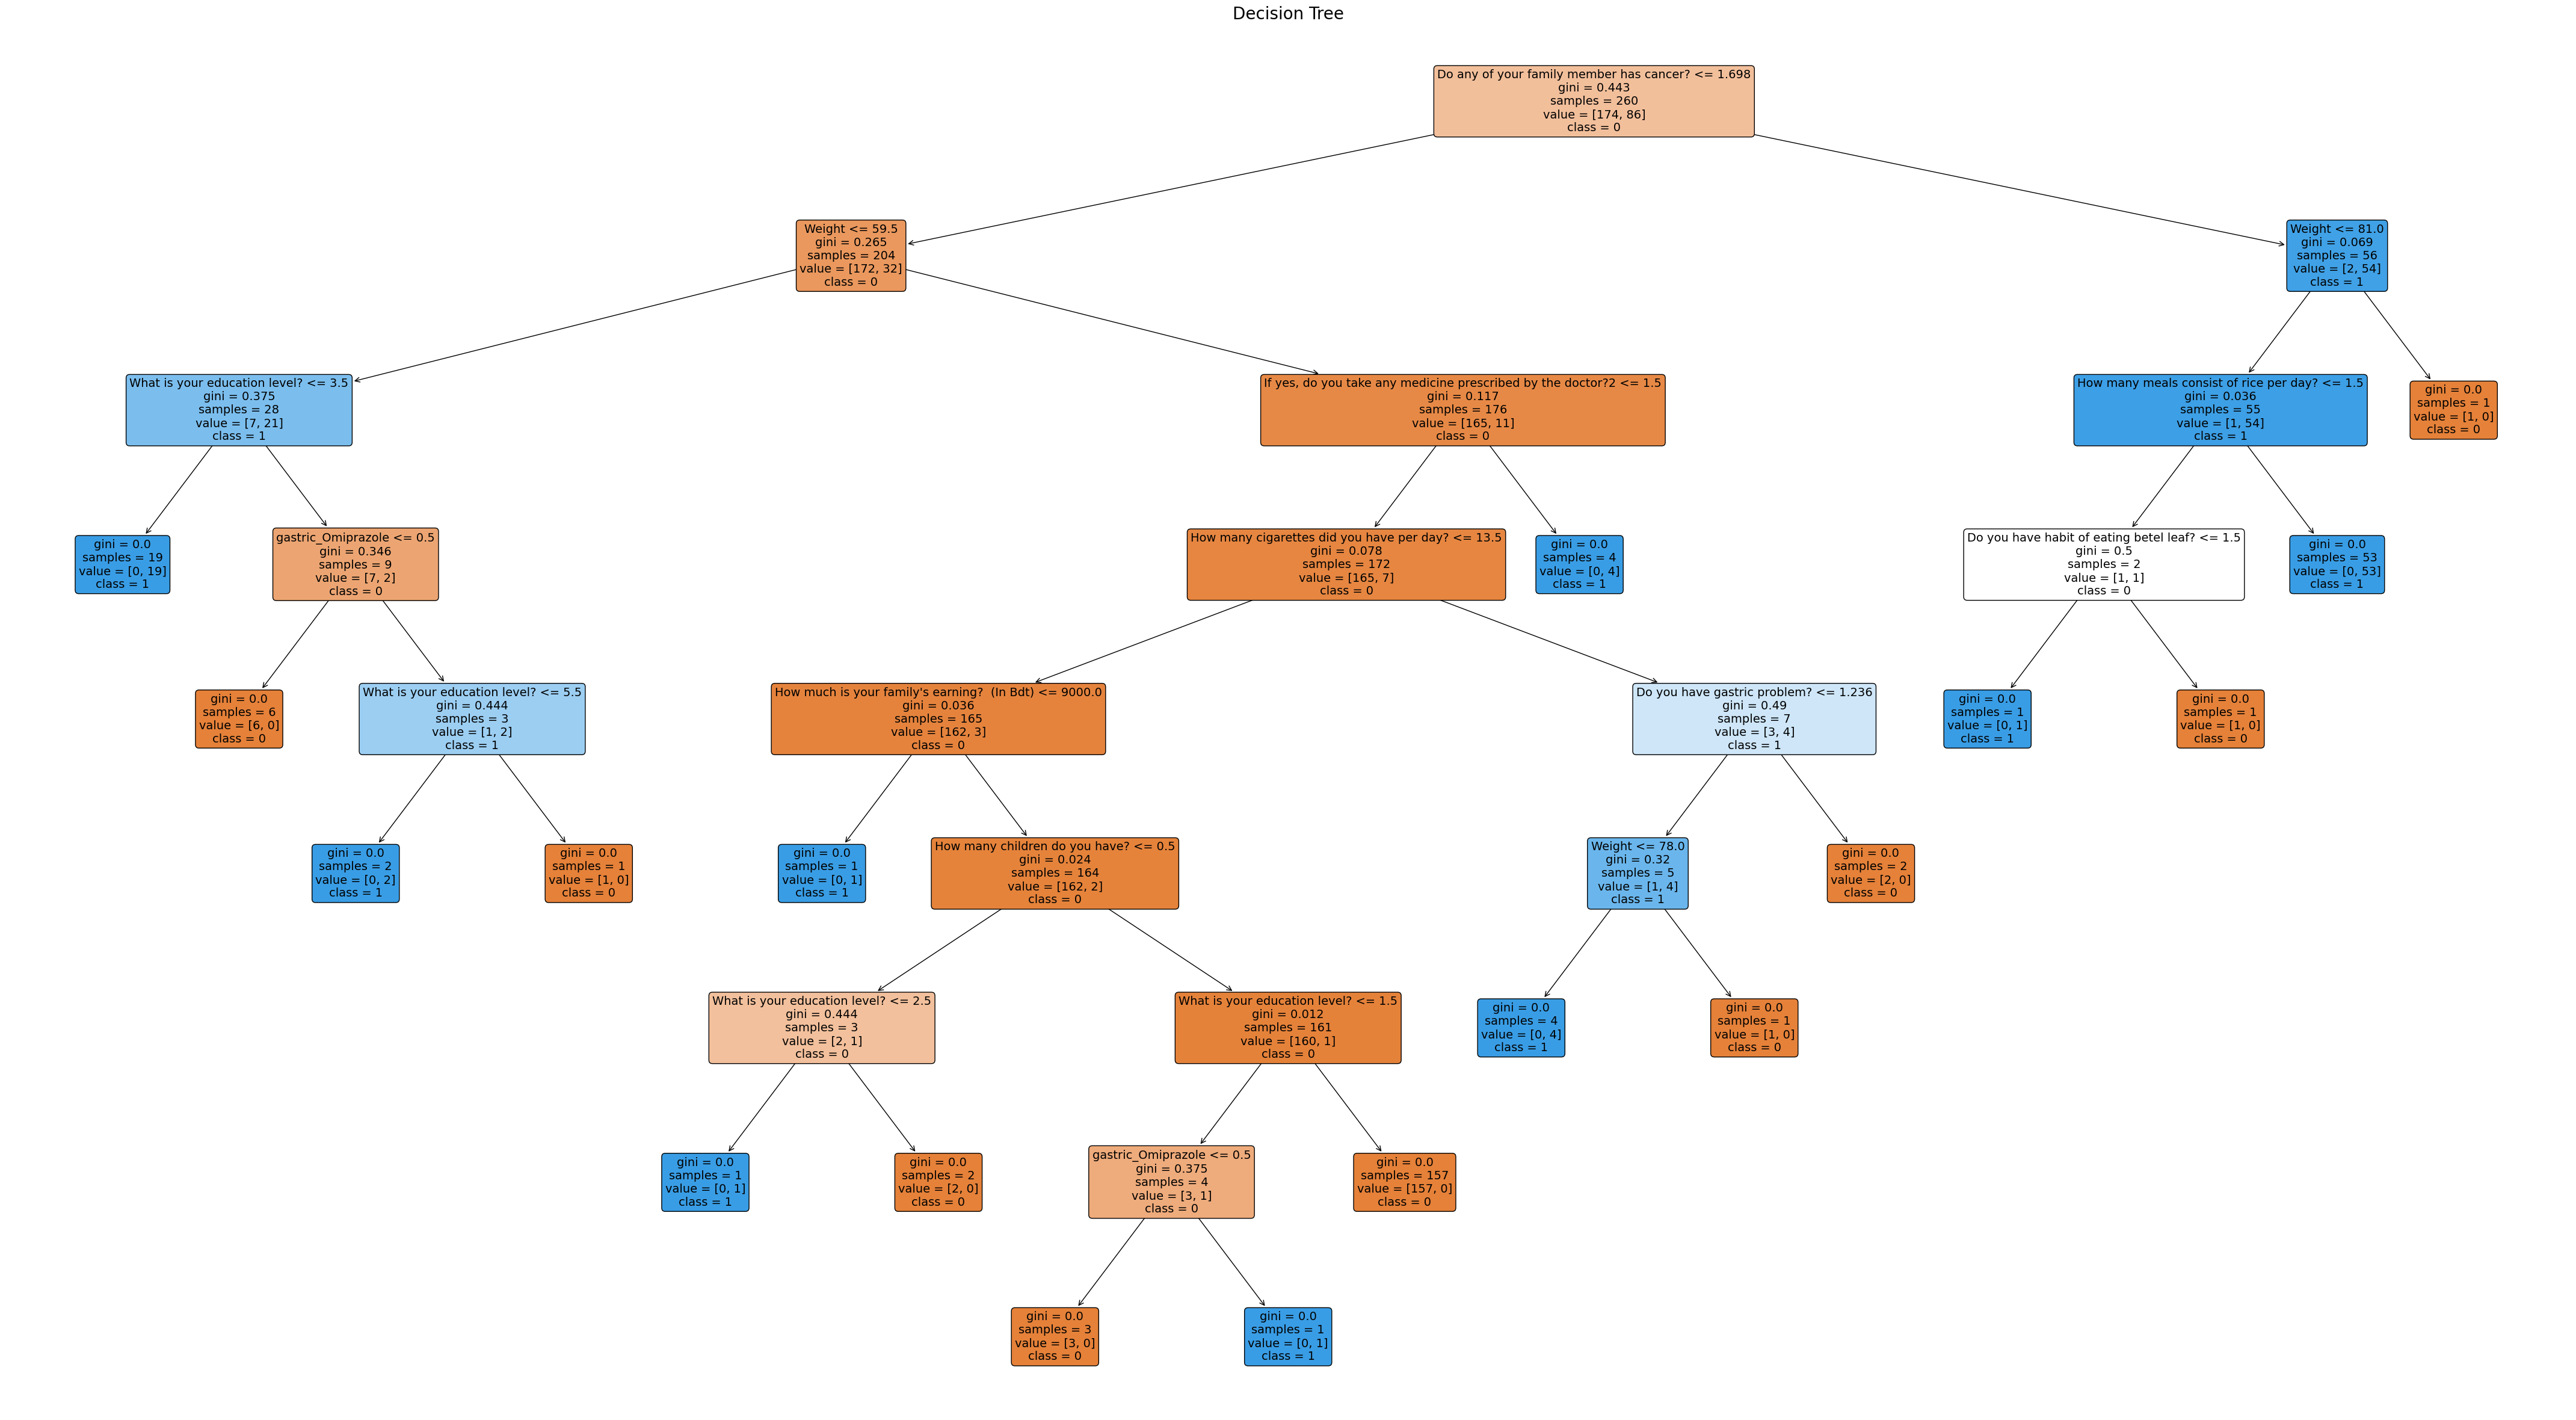

<Figure size 640x480 with 0 Axes>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split the dataset into features (X) and the target variable (y)
X = selected_features_df.drop('output', axis=1)
y = selected_features_df['output']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets (80% train, 20% test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Print the decision tree
#tree_text = export_text(dt_classifier, feature_names=X.columns.tolist())
#print("Decision Tree:")
#print(tree_text)

# Plot the decision tree graphically with increased fontsize
plt.figure(figsize=(55, 30))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=14)
plt.title("Decision Tree", fontsize=20)
plt.show()

# Save the decision tree plot as a PNG image
plt.savefig('decision_tree.png', dpi=300)

Decision Tree Accuracy: 0.9242424242424242
XGBoost Accuracy: 0.9393939393939394
Random Forest Accuracy: 0.9848484848484849


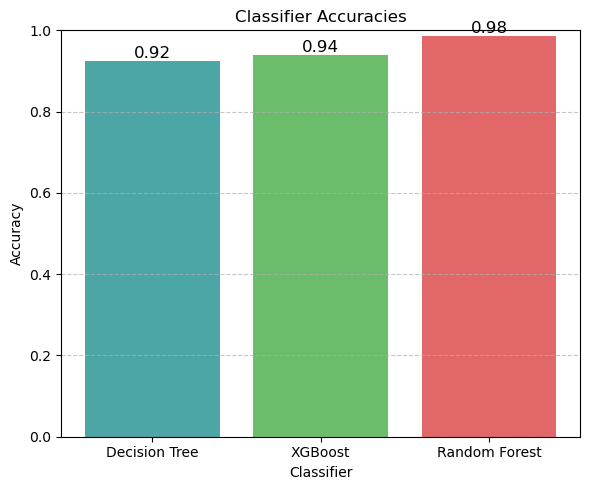

'# Plot the bar chart\nplt.figure(figsize=(4, 6))\nplt.bar(accuracies.keys(), accuracies.values(), color=[\'b\', \'g\', \'r\'], alpha=0.7)\nplt.title("Classifier Accuracies")\nplt.xlabel("Classifier")\nplt.ylabel("Accuracy")\nplt.ylim(0, 1)\nplt.grid(axis=\'y\', linestyle=\'--\', alpha=0.7)\nplt.show()'

In [74]:
# Train XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
dt_predictions = dt_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the models
dt_accuracy = accuracy_score(y_test, dt_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Store the accuracies in a dictionary
accuracies = {
    'Decision Tree': dt_accuracy,
    'XGBoost': xgb_accuracy,
    'Random Forest': rf_accuracy
}

# Define custom colors for the bars
colors = ['#008080', '#2ca02c', '#d62728']

# Plot the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors, alpha=0.7)

# Add the accuracy value above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.title("Classifier Accuracies")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



'''# Plot the bar chart
plt.figure(figsize=(4, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['b', 'g', 'r'], alpha=0.7)
plt.title("Classifier Accuracies")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()'''

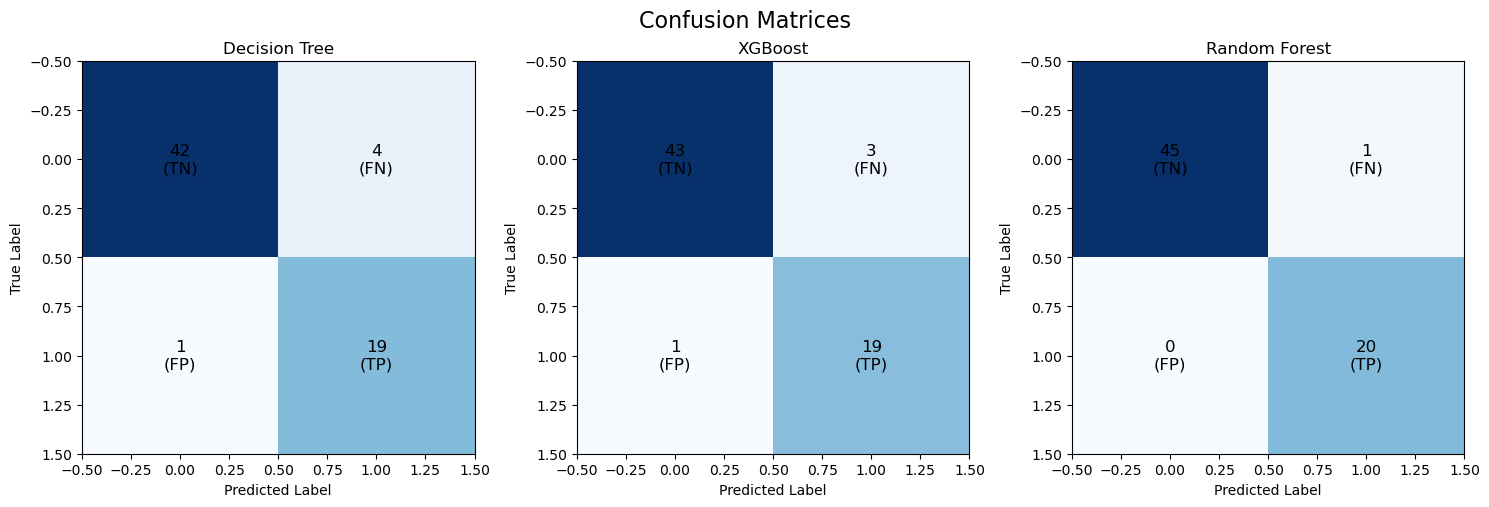

In [75]:
# Create confusion matrices
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrices with TP and TN labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Confusion Matrices", fontsize=16)

# Function to annotate the confusion matrix cells with labels (TP, TN, FP, FN)
def annotate_confusion_matrix(matrix, ax):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            value = matrix[i, j]
            label = ""
            if i == j:
                label = "TP" if i == 1 else "TN"
            else:
                label = "FP" if i == 1 else "FN"
            ax.text(j, i, f"{value}\n({label})", ha='center', va='center', color='black', fontsize=12)

# Decision Tree
axes[0].imshow(dt_confusion_matrix, cmap='Blues', interpolation='nearest')
axes[0].set_title("Decision Tree")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
annotate_confusion_matrix(dt_confusion_matrix, axes[0])

# XGBoost
axes[1].imshow(xgb_confusion_matrix, cmap='Blues', interpolation='nearest')
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")
annotate_confusion_matrix(xgb_confusion_matrix, axes[1])

# Random Forest
axes[2].imshow(rf_confusion_matrix, cmap='Blues', interpolation='nearest')
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")
annotate_confusion_matrix(rf_confusion_matrix, axes[2])

plt.tight_layout()
plt.show()


In [76]:
# Create classification reports
dt_classification_report = classification_report(y_test, dt_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

print("Decision Tree Classification Report:")
print(dt_classification_report)

print("XGBoost Classification Report:")
print(xgb_classification_report)

print("Random Forest Classification Report:")
print(rf_classification_report)


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.83      0.95      0.88        20

    accuracy                           0.92        66
   macro avg       0.90      0.93      0.91        66
weighted avg       0.93      0.92      0.93        66

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.86      0.95      0.90        20

    accuracy                           0.94        66
   macro avg       0.92      0.94      0.93        66
weighted avg       0.94      0.94      0.94        66

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.95      1.00      0.98        20

    accuracy                           0.98        66
   macro avg       0.98

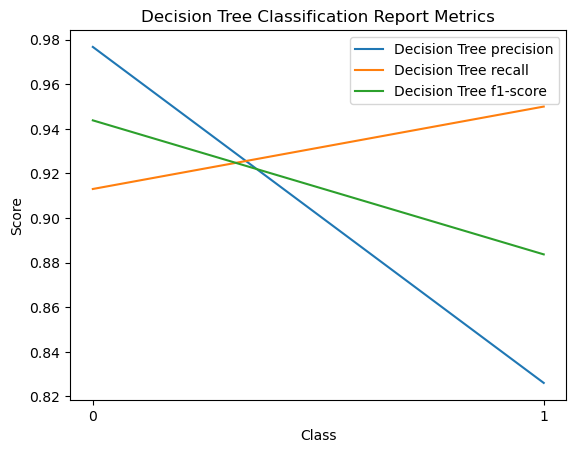

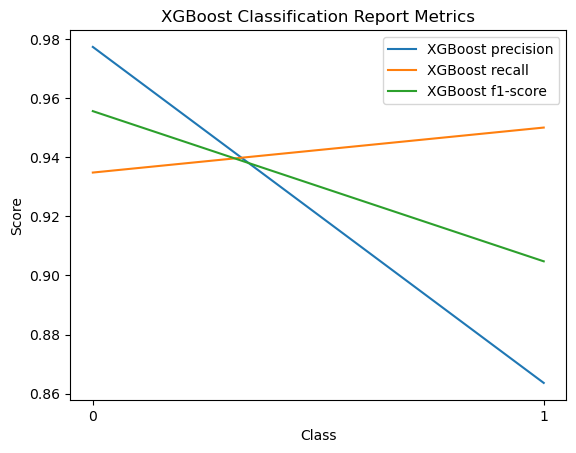

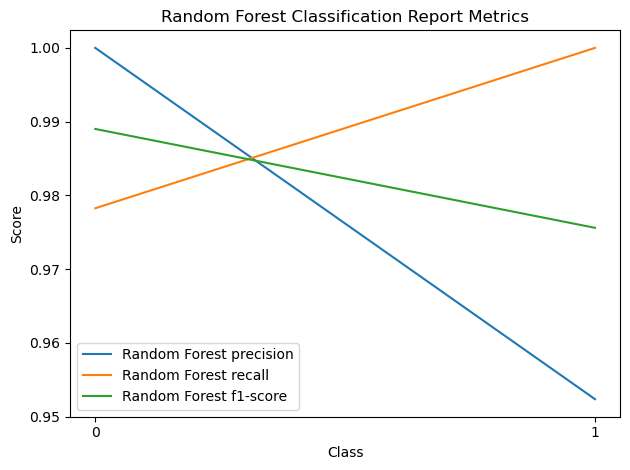

In [77]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Assuming you have your y_test and predictions (dt_predictions, xgb_predictions, rf_predictions) ready

# Get the classification report for each model
dt_classification_report = classification_report(y_test, dt_predictions, output_dict=True)
xgb_classification_report = classification_report(y_test, xgb_predictions, output_dict=True)
rf_classification_report = classification_report(y_test, rf_predictions, output_dict=True)

# Extract precision, recall, and F1-score for each class
classes = [str(cls) for cls in dt_classification_report.keys() if cls.isdigit()]
metrics = ['precision', 'recall', 'f1-score']

# Initialize dictionaries to store metrics for each model
dt_metrics = {metric: [dt_classification_report[cls][metric] for cls in classes] for metric in metrics}
xgb_metrics = {metric: [xgb_classification_report[cls][metric] for cls in classes] for metric in metrics}
rf_metrics = {metric: [rf_classification_report[cls][metric] for cls in classes] for metric in metrics}

# Set up the figure and axes for Decision Tree
fig_dt, ax_dt = plt.subplots()
ax_dt.set_xlabel('Class')
ax_dt.set_ylabel('Score')
ax_dt.set_title('Decision Tree Classification Report Metrics')
for metric in metrics:
    ax_dt.plot(classes, dt_metrics[metric], label=f'Decision Tree {metric}')
ax_dt.legend()

# Set up the figure and axes for XGBoost
fig_xgb, ax_xgb = plt.subplots()
ax_xgb.set_xlabel('Class')
ax_xgb.set_ylabel('Score')
ax_xgb.set_title('XGBoost Classification Report Metrics')
for metric in metrics:
    ax_xgb.plot(classes, xgb_metrics[metric], label=f'XGBoost {metric}')
ax_xgb.legend()

# Set up the figure and axes for Random Forest
fig_rf, ax_rf = plt.subplots()
ax_rf.set_xlabel('Class')
ax_rf.set_ylabel('Score')
ax_rf.set_title('Random Forest Classification Report Metrics')
for metric in metrics:
    ax_rf.plot(classes, rf_metrics[metric], label=f'Random Forest {metric}')
ax_rf.legend()

# Show the plots
plt.tight_layout()
plt.show()
